In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
# from transformers import BertTokenizer, TFBertModel
# from tensorflow.keras.layers import Input, Dense, Concatenate, GlobalAveragePooling1D
# from tensorflow.keras.models import Model
# from tensorflow.keras.optimizers import Adam

2023-11-29 23:58:00.055573: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-29 23:58:00.097877: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-29 23:58:00.097911: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-29 23:58:00.097938: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-29 23:58:00.107966: I tensorflow/core/platform/cpu_feature_g

In [2]:
train_file_path = 'train.tsv'

# Specify the column names
column_names = ['Id', 'Label', 'Statement', 'Subject', 'Speaker', 'Job_title', 'State_info',
                'Party_affiliation', 'Barely_true_counts', 'False_counts', 'Half_true_counts',
                'Mostly_true_counts', 'Pants_on_fire_counts', 'Context']

# Read the TSV file into a Pandas DataFrame with specified column names
train_df = pd.read_csv(train_file_path, sep='\t', header=None, names=column_names)

In [3]:
val_file_path = 'valid.tsv'

# Specify the column names
column_names = ['Id', 'Label', 'Statement', 'Subject', 'Speaker', 'Job_title', 'State_info',
                'Party_affiliation', 'Barely_true_counts', 'False_counts', 'Half_true_counts',
                'Mostly_true_counts', 'Pants_on_fire_counts', 'Context']

# Read the TSV file into a Pandas DataFrame with specified column names
val_df = pd.read_csv(val_file_path, sep='\t', header=None, names=column_names)

In [4]:
test_file_path = 'test.tsv'

# Specify the column names
column_names = ['Id', 'Label', 'Statement', 'Subject', 'Speaker', 'Job_title', 'State_info',
                'Party_affiliation', 'Barely_true_counts', 'False_counts', 'Half_true_counts',
                'Mostly_true_counts', 'Pants_on_fire_counts', 'Context']

# Read the TSV file into a Pandas DataFrame with specified column names
test_df = pd.read_csv(test_file_path, sep='\t', header=None, names=column_names)

In [5]:
# Assuming df is your DataFrame
column_data_types = train_df.dtypes

# Display the data types of each column
print(column_data_types)


Id                       object
Label                    object
Statement                object
Subject                  object
Speaker                  object
Job_title                object
State_info               object
Party_affiliation        object
Barely_true_counts      float64
False_counts            float64
Half_true_counts        float64
Mostly_true_counts      float64
Pants_on_fire_counts    float64
Context                  object
dtype: object


In [6]:
columns_to_check = ['Barely_true_counts', 'False_counts', 'Half_true_counts', 'Mostly_true_counts', 'Pants_on_fire_counts']
train_df = train_df.dropna(subset=columns_to_check)
val_df = val_df.dropna(subset=columns_to_check)
test_df = test_df.dropna(subset=columns_to_check)

# Display the updated DataFrame
print(train_df.isna().sum())

Id                         0
Label                      0
Statement                  0
Subject                    0
Speaker                    0
Job_title               2896
State_info              2208
Party_affiliation          0
Barely_true_counts         0
False_counts               0
Half_true_counts           0
Mostly_true_counts         0
Pants_on_fire_counts       0
Context                  100
dtype: int64


In [7]:
train_labels= train_df['Label'].values
val_labels= val_df['Label'].values
test_labels= test_df['Label'].values

In [8]:
class_labels = {'pants-fire': 0,'false': 1, 'barely-true': 2, 'half-true': 3, 'mostly-true': 4, 'true': 5}

In [9]:
# Convert integers to one-hot encoded categorical labels
encoded_labels = [class_labels[label] for label in train_labels]
train_cat_labels = to_categorical(encoded_labels, num_classes=6)

In [10]:
encoded_labels = [class_labels[label] for label in val_labels]
val_cat_labels = to_categorical(encoded_labels, num_classes=6)

In [11]:
encoded_labels = [class_labels[label] for label in test_labels]
test_cat_labels = to_categorical(encoded_labels, num_classes=6)

#Trial 1

Use only statement

In [ ]:
# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

2023-11-29 11:40:11.060201: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38374 MB memory:  -> device: 0, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:1e:00.0, compute capability: 8.0
2023-11-29 11:40:13.109314: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected 

In [ ]:
statement_len=[]
for i in train_df['Statement']:
  if len(i)<500:
    statement_len.append(len(i))

In [ ]:
print(len(statement_len))

10236


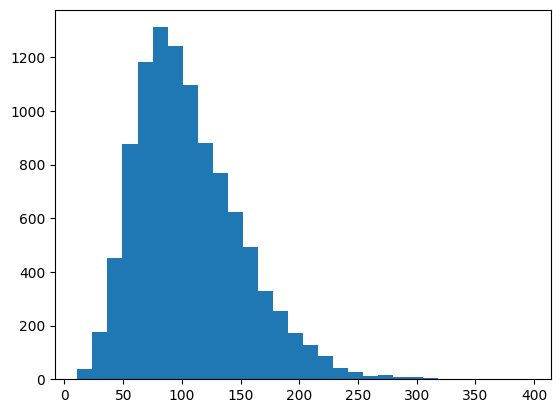

In [ ]:
import matplotlib.pyplot as plt

plt.hist(statement_len, 30)
plt.show()

In [ ]:
max_len= 160

In [ ]:
train_texts = train_df['Statement'].values
val_texts = val_df['Statement'].values
test_texts = test_df['Statement'].values
# Tokenize and pad the input sequences
train_tokenized_inputs = tokenizer(train_texts.tolist(), padding=True, truncation=True, max_length=max_len, return_tensors="tf")
val_tokenized_inputs = tokenizer(val_texts.tolist(), padding=True, truncation=True, max_length=max_len, return_tensors="tf")
test_tokenized_inputs = tokenizer(test_texts.tolist(), padding= True, truncation=True, max_length=max_len, return_tensors="tf")

In [ ]:
train_tokenized_inputs

{'input_ids': <tf.Tensor: shape=(10240, 160), dtype=int32, numpy=
array([[  101,  2758,  1996, ...,     0,     0,     0],
       [  101,  2043,  2106, ...,     0,     0,     0],
       [  101, 18520,  7207, ...,     0,     0,     0],
       ...,
       [  101,  2758,  2019, ...,     0,     0,     0],
       [  101,  2006,  8783, ...,     0,     0,     0],
       [  101,  1996,  2533, ...,     0,     0,     0]], dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(10240, 160), dtype=int32, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(10240, 160), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype

In [ ]:
# Define callbacks
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [ ]:
class MyBERTModel(Model):
    def __init__(self):
        super(MyBERTModel, self).__init__()
        self.bert_model = bert_model  # Assuming you have a pre-defined bert_model

        # Add your custom layers here
        self.global_avg_pooling = GlobalAveragePooling1D()
        self.dense1 = Dense(128, activation='sigmoid')
        self.dense2 = Dense(64, activation='sigmoid')
        self.dense3 = Dense(6, activation='softmax')
        self.bert_model.trainable = False

    def call(self, inputs):
        outputs = self.bert_model(inputs)["last_hidden_state"]
        pooled_output = self.global_avg_pooling(outputs)
        den = self.dense1(pooled_output)
        den = self.dense2(den)
        out = self.dense3(den)
        return out

# Create an instance of the model
model = MyBERTModel()

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

#Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=1)

In [ ]:
# Fit the model
history= model.fit(train_tokenized_inputs['input_ids'], train_cat_labels, epochs=20, validation_data=(val_tokenized_inputs['input_ids'], val_cat_labels), callbacks=[early_stopping])


Epoch 1/20


2023-11-29 11:40:40.658690: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7efe80a74a50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-29 11:40:40.658713: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA A100-PCIE-40GB, Compute Capability 8.0
2023-11-29 11:40:40.664754: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-29 11:40:41.605904: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2023-11-29 11:40:41.730504: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


320/320 [==============================] - 40s 92ms/step - loss: 1.7745 - accuracy: 0.1968 - val_loss: 1.7657 - val_accuracy: 0.1924
Epoch 2/20
320/320 [==============================] - 27s 85ms/step - loss: 1.7639 - accuracy: 0.2015 - val_loss: 1.7639 - val_accuracy: 0.2048
Epoch 3/20
320/320 [==============================] - 27s 85ms/step - loss: 1.7658 - accuracy: 0.1896 - val_loss: 1.7703 - val_accuracy: 0.2048
Epoch 4/20
320/320 [==============================] - 28s 86ms/step - loss: 1.7629 - accuracy: 0.2021 - val_loss: 1.7644 - val_accuracy: 0.1931
Epoch 5/20
320/320 [==============================] - 28s 87ms/step - loss: 1.7624 - accuracy: 0.2040 - val_loss: 1.7711 - val_accuracy: 0.1916
Epoch 6/20
320/320 [==============================] - 28s 88ms/step - loss: 1.7624 - accuracy: 0.1926 - val_loss: 1.7634 - val_accuracy: 0.2048
Epoch 7/20
320/320 [==============================] - 30s 93ms/step - loss: 1.7626 - accuracy: 0.1986 - val_loss: 1.7679 - val_accuracy: 0.1955
Epo

40/40 [==============================] - 6s 92ms/step - loss: 1.7630 - accuracy: 0.1681
Test Loss: 1.7630407810211182, Test Accuracy: 0.16811364889144897


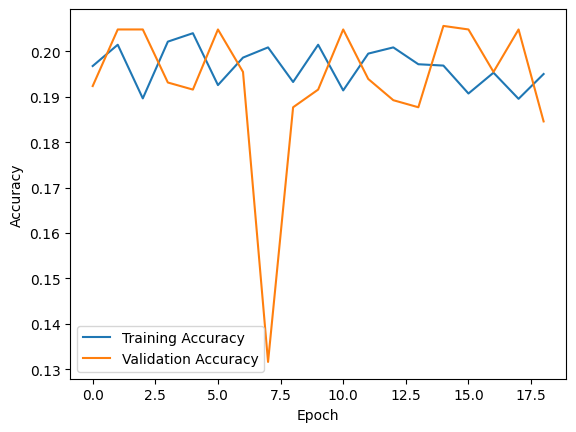

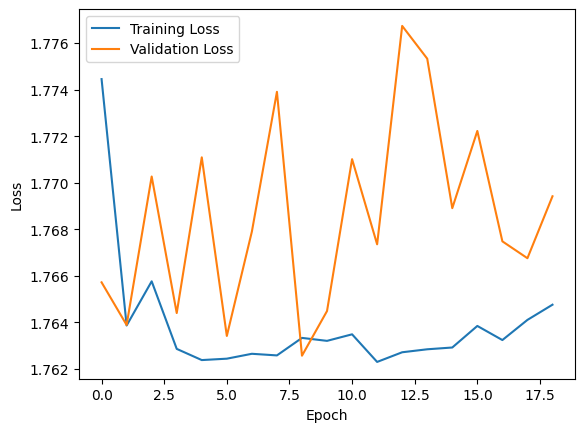

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_tokenized_inputs['input_ids'], test_cat_labels)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Smaller dense network

In [ ]:
bert_model = TFBertModel.from_pretrained('bert-base-uncased')
class MyBERTModel(Model):
    def __init__(self):
        super(MyBERTModel, self).__init__()
        self.bert_model = bert_model  # Assuming you have a pre-defined bert_model

        # Add your custom layers here
        self.global_avg_pooling = GlobalAveragePooling1D()
        self.dense1 = Dense(64, activation='sigmoid')
        self.dense2 = Dense(6, activation='softmax')
        self.bert_model.trainable = False

    def call(self, inputs):
        outputs = self.bert_model(inputs)["last_hidden_state"]
        pooled_output = self.global_avg_pooling(outputs)
        den = self.dense1(pooled_output)
        out = self.dense2(den)
        return out

# Create an instance of the model
model = MyBERTModel()

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

#Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
# Fit the model
history= model.fit(train_tokenized_inputs['input_ids'], train_cat_labels, epochs=20, validation_data=(val_tokenized_inputs['input_ids'], val_cat_labels), callbacks=[early_stopping])

Epoch 1/20
320/320 [==============================] - 36s 98ms/step - loss: 1.7940 - accuracy: 0.1937 - val_loss: 1.8288 - val_accuracy: 0.1931
Epoch 2/20
320/320 [==============================] - 31s 96ms/step - loss: 1.7809 - accuracy: 0.1917 - val_loss: 1.7959 - val_accuracy: 0.1908
Epoch 3/20
320/320 [==============================] - 31s 98ms/step - loss: 1.7796 - accuracy: 0.2010 - val_loss: 1.7765 - val_accuracy: 0.1830
Epoch 4/20
320/320 [==============================] - 32s 99ms/step - loss: 1.7813 - accuracy: 0.2000 - val_loss: 1.7795 - val_accuracy: 0.1908
Epoch 5/20
320/320 [==============================] - 32s 100ms/step - loss: 1.7765 - accuracy: 0.1937 - val_loss: 1.8128 - val_accuracy: 0.1908
Epoch 6/20
320/320 [==============================] - 32s 99ms/step - loss: 1.7768 - accuracy: 0.1979 - val_loss: 1.7781 - val_accuracy: 0.2072
Epoch 7/20
320/320 [==============================] - 32s 100ms/step - loss: 1.7803 - accuracy: 0.1897 - val_loss: 1.7662 - val_accurac

40/40 [==============================] - 6s 91ms/step - loss: 1.7773 - accuracy: 0.1973
Test Loss: 1.7773480415344238, Test Accuracy: 0.1973164975643158


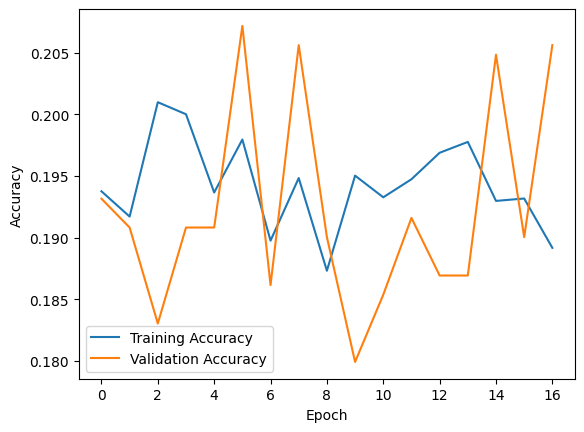

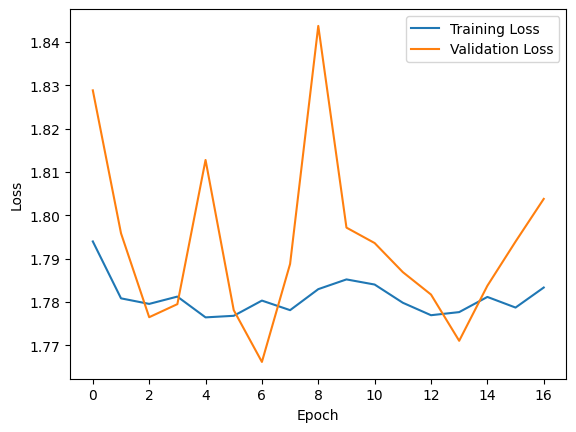

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_tokenized_inputs['input_ids'], test_cat_labels)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

UnFrozen Architecture, slow learning

In [ ]:
bert_model = TFBertModel.from_pretrained('bert-base-uncased')
class MyBERTModel(Model):
    def __init__(self):
        super(MyBERTModel, self).__init__()
        self.bert_model = bert_model  # Assuming you have a pre-defined bert_model

        # Add your custom layers here
        self.global_avg_pooling = GlobalAveragePooling1D()
        self.dense1 = Dense(128, activation='sigmoid')
        self.dense2 = Dense(64,  activation='sigmoid')
        self.dense3 = Dense(6, activation='softmax')

    def call(self, inputs):
        outputs = self.bert_model(inputs)["last_hidden_state"]
        pooled_output = self.global_avg_pooling(outputs)
        den = self.dense1(pooled_output)
        den = self.dense2(den)
        out = self.dense3(den)
        return out

# Create an instance of the model
model = MyBERTModel()

# Compile the model
model.compile(optimizer=Adam(learning_rate=2e-5),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

#Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
# Fit the model
history= model.fit(train_tokenized_inputs['input_ids'], train_cat_labels, epochs=20, validation_data=(val_tokenized_inputs['input_ids'], val_cat_labels), callbacks=[early_stopping])

Epoch 1/20
320/320 [==============================] - 113s 274ms/step - loss: 1.7651 - accuracy: 0.1999 - val_loss: 1.7638 - val_accuracy: 0.1924
Epoch 2/20
320/320 [==============================] - 91s 283ms/step - loss: 1.7542 - accuracy: 0.2120 - val_loss: 1.7500 - val_accuracy: 0.2305
Epoch 3/20
320/320 [==============================] - 91s 286ms/step - loss: 1.7233 - accuracy: 0.2551 - val_loss: 1.7124 - val_accuracy: 0.2531
Epoch 4/20
320/320 [==============================] - 92s 286ms/step - loss: 1.6606 - accuracy: 0.2978 - val_loss: 1.7130 - val_accuracy: 0.2570
Epoch 5/20
320/320 [==============================] - 91s 286ms/step - loss: 1.5296 - accuracy: 0.3812 - val_loss: 1.7300 - val_accuracy: 0.2609
Epoch 6/20
320/320 [==============================] - 91s 286ms/step - loss: 1.3384 - accuracy: 0.5098 - val_loss: 1.8406 - val_accuracy: 0.2477
Epoch 7/20
320/320 [==============================] - 91s 286ms/step - loss: 1.1531 - accuracy: 0.6277 - val_loss: 1.8807 - val_a

40/40 [==============================] - 6s 91ms/step - loss: 2.2872 - accuracy: 0.2644
Test Loss: 2.2872073650360107, Test Accuracy: 0.2644041180610657


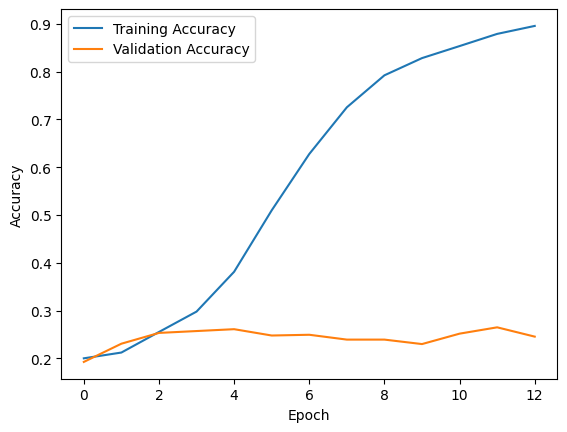

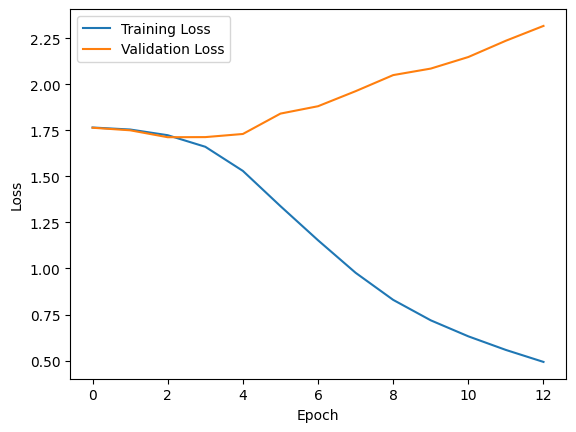

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_tokenized_inputs['input_ids'], test_cat_labels)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


UnFrozen Architecture, slow learning, smaller deep network

In [ ]:
bert_model = TFBertModel.from_pretrained('bert-base-uncased')
class MyBERTModel(Model):
    def __init__(self):
        super(MyBERTModel, self).__init__()
        self.bert_model = bert_model  # Assuming you have a pre-defined bert_model

        # Add your custom layers here
        self.global_avg_pooling = GlobalAveragePooling1D()
        self.dense1 = Dense(64,  activation='sigmoid')
        self.dense2 = Dense(6, activation='softmax')

    def call(self, inputs):
        outputs = self.bert_model(inputs)["last_hidden_state"]
        pooled_output = self.global_avg_pooling(outputs)
        den = self.dense1(pooled_output)
        out = self.dense2(den)
        return out

# Create an instance of the model
model = MyBERTModel()

# Compile the model
model.compile(optimizer=Adam(learning_rate=2e-5),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

#Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
# Fit the model
history= model.fit(train_tokenized_inputs['input_ids'], train_cat_labels, epochs=20, validation_data=(val_tokenized_inputs['input_ids'], val_cat_labels), callbacks=[early_stopping])

Epoch 1/10
320/320 [==============================] - 109s 265ms/step - loss: 1.7935 - accuracy: 0.1986 - val_loss: 1.8204 - val_accuracy: 0.1931
Epoch 2/10
320/320 [==============================] - 90s 281ms/step - loss: 1.7885 - accuracy: 0.1894 - val_loss: 1.8151 - val_accuracy: 0.1931
Epoch 3/10
320/320 [==============================] - 91s 286ms/step - loss: 1.7811 - accuracy: 0.1886 - val_loss: 1.7888 - val_accuracy: 0.1931
Epoch 4/10
320/320 [==============================] - 91s 284ms/step - loss: 1.7830 - accuracy: 0.1905 - val_loss: 1.7814 - val_accuracy: 0.1846
Epoch 5/10
320/320 [==============================] - 91s 286ms/step - loss: 1.7876 - accuracy: 0.1925 - val_loss: 1.7665 - val_accuracy: 0.1931
Epoch 6/10
320/320 [==============================] - 91s 285ms/step - loss: 1.7823 - accuracy: 0.1939 - val_loss: 1.8210 - val_accuracy: 0.1931
Epoch 7/10
320/320 [==============================] - 91s 285ms/step - loss: 1.7836 - accuracy: 0.1917 - val_loss: 1.7887 - val_a

40/40 [==============================] - 6s 87ms/step - loss: 3.0071 - accuracy: 0.2612
Test Loss: 3.007131576538086, Test Accuracy: 0.26124703884124756


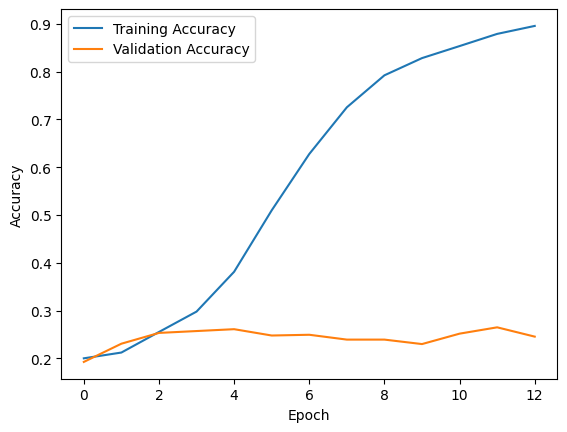

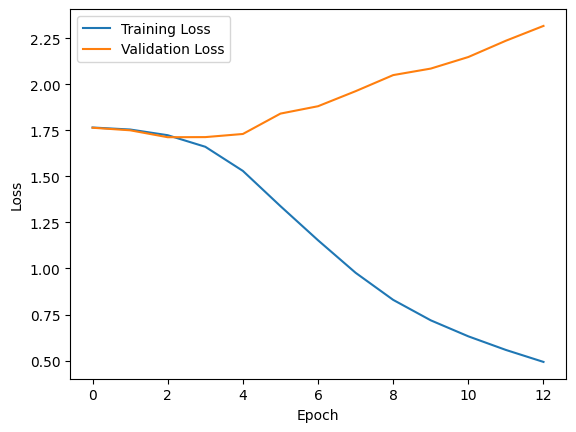

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_tokenized_inputs['input_ids'], test_cat_labels)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Trial 2

In [12]:
import pandas as pd
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras.layers import Input, Dense, Concatenate, GlobalAveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [14]:
selected_columns = ['Statement', 'Subject', 'Speaker', 'Job_title', 'State_info', 'Party_affiliation', 'Context']

# Create a new column 'New_Column' with the desired format using only the specified columns
train_df['New_Column'] = train_df[selected_columns].apply(lambda row: ', '.join([f'{col}: "{row[col]}"' for col in selected_columns]), axis=1)
val_df['New_Column']   = val_df[selected_columns].apply(lambda row: ', '.join([f'{col}: "{row[col]}"' for col in selected_columns]), axis=1)
test_df['New_Column'] = test_df[selected_columns].apply(lambda row: ', '.join([f'{col}: "{row[col]}"' for col in selected_columns]), axis=1)

In [15]:
statement_len=[]
for i in train_df['New_Column']:
  if len(i)<500:
    statement_len.append(len(i))

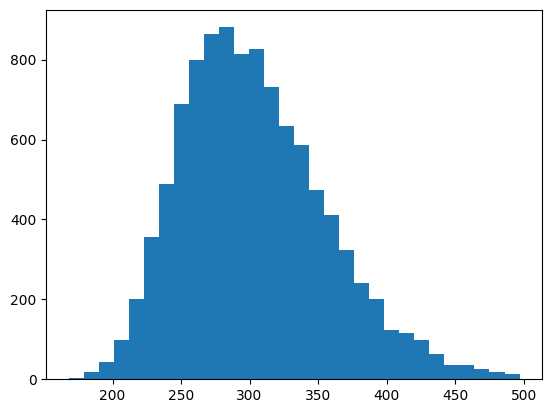

In [16]:
import matplotlib.pyplot as plt

plt.hist(statement_len, 30)
plt.show()

In [17]:
max_len= 400

In [ ]:
# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
train_texts = train_df['New_Column'].values
val_texts = val_df['New_Column'].values
test_texts= test_df['New_Column'].values

# Tokenize and pad the input sequences
train_tokenized_inputs = tokenizer(train_texts.tolist(), padding=True, truncation=True, max_length=max_len, return_tensors="tf")
val_tokenized_inputs = tokenizer(val_texts.tolist(), padding=True, truncation=True, max_length=max_len, return_tensors="tf")
test_tokenized_inputs = tokenizer(test_texts.tolist(), padding=True, truncation=True, max_length=max_len, return_tensors="tf")

Best one from Above architecture

In [ ]:
bert_model = TFBertModel.from_pretrained('bert-base-uncased')
class MyBERTModel(Model):
    def __init__(self):
        super(MyBERTModel, self).__init__()
        self.bert_model = bert_model  # Assuming you have a pre-defined bert_model

        # Add your custom layers here
        self.global_avg_pooling = GlobalAveragePooling1D()
        self.dense1 = Dense(128, activation='sigmoid')
        self.dense2 = Dense(64,  activation='sigmoid')
        self.dense3 = Dense(6, activation='softmax')

    def call(self, inputs):
        outputs = self.bert_model(inputs)["last_hidden_state"]
        pooled_output = self.global_avg_pooling(outputs)
        den = self.dense1(pooled_output)
        den = self.dense2(den)
        out = self.dense3(den)
        return out

# Create an instance of the model
model = MyBERTModel()

# Compile the model
model.compile(optimizer=Adam(learning_rate=2e-5),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

#Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
# Fit the model
history= model.fit(train_tokenized_inputs['input_ids'], train_cat_labels, epochs=20, validation_data=(val_tokenized_inputs['input_ids'], val_cat_labels), callbacks=[early_stopping])

Epoch 1/20
320/320 [==============================] - 254s 716ms/step - loss: 1.7870 - accuracy: 0.2064 - val_loss: 1.7693 - val_accuracy: 0.1931
Epoch 2/20
320/320 [==============================] - 242s 755ms/step - loss: 1.7603 - accuracy: 0.2066 - val_loss: 1.7646 - val_accuracy: 0.1931
Epoch 3/20
320/320 [==============================] - 242s 757ms/step - loss: 1.7582 - accuracy: 0.2064 - val_loss: 1.7627 - val_accuracy: 0.1931
Epoch 4/20
320/320 [==============================] - 242s 757ms/step - loss: 1.7544 - accuracy: 0.2091 - val_loss: 1.7461 - val_accuracy: 0.2290
Epoch 5/20
320/320 [==============================] - 242s 756ms/step - loss: 1.7336 - accuracy: 0.2223 - val_loss: 1.7060 - val_accuracy: 0.2469
Epoch 6/20
320/320 [==============================] - 243s 759ms/step - loss: 1.7066 - accuracy: 0.2416 - val_loss: 1.7055 - val_accuracy: 0.2321
Epoch 7/20
320/320 [==============================] - 242s 758ms/step - loss: 1.6870 - accuracy: 0.2570 - val_loss: 1.7033 -

40/40 [==============================] - 13s 249ms/step - loss: 1.9474 - accuracy: 0.2731
Test Loss: 1.94742751121521, Test Accuracy: 0.2730860412120819


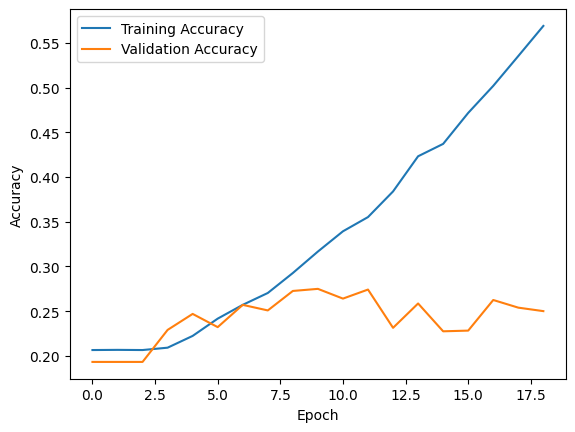

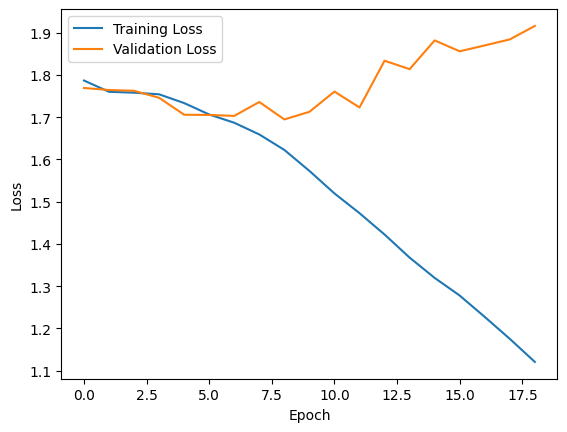

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_tokenized_inputs['input_ids'], test_cat_labels)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Trial 3- Using all features

In [12]:
train_numeric_features = train_df[['Barely_true_counts', 'False_counts', 'Half_true_counts', 'Mostly_true_counts', 'Pants_on_fire_counts']].values.tolist()
val_numeric_features  = val_df[['Barely_true_counts', 'False_counts', 'Half_true_counts', 'Mostly_true_counts', 'Pants_on_fire_counts']].values.tolist()
test_numeric_features = test_df[['Barely_true_counts', 'False_counts', 'Half_true_counts', 'Mostly_true_counts', 'Pants_on_fire_counts']].values.tolist()


In [13]:
import numpy as np
train_numeric_features = np.array(train_numeric_features)
val_numeric_features = np.array(val_numeric_features)
test_numeric_features = np.array(test_numeric_features)

In [14]:
type(test_numeric_features)

numpy.ndarray

In [15]:
selected_columns = ['Statement', 'Subject', 'Speaker', 'Job_title', 'State_info', 'Party_affiliation', 'Context']

# Create a new column 'New_Column' with the desired format using only the specified columns
train_df['New_Column'] = train_df[selected_columns].apply(lambda row: ', '.join([f'{col}: "{row[col]}"' for col in selected_columns]), axis=1)
val_df['New_Column']   = val_df[selected_columns].apply(lambda row: ', '.join([f'{col}: "{row[col]}"' for col in selected_columns]), axis=1)
test_df['New_Column'] = test_df[selected_columns].apply(lambda row: ', '.join([f'{col}: "{row[col]}"' for col in selected_columns]), axis=1)

In [17]:
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras.layers import Input, Dense, Concatenate, GlobalAveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [18]:
# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

2023-11-29 23:59:49.572574: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38374 MB memory:  -> device: 0, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:20:00.0, compute capability: 8.0
2023-11-29 23:59:51.429329: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected 

In [20]:
max_len= 400

In [21]:
train_texts = train_df['New_Column'].values
val_texts = val_df['New_Column'].values
test_texts= test_df['New_Column'].values

# Tokenize and pad the input sequences
train_tokenized_inputs = tokenizer(train_texts.tolist(), padding=True, truncation=True, max_length=max_len, return_tensors="tf")
val_tokenized_inputs = tokenizer(val_texts.tolist(), padding=True, truncation=True, max_length=max_len, return_tensors="tf")
test_tokenized_inputs = tokenizer(test_texts.tolist(), padding=True, truncation=True, max_length=max_len, return_tensors="tf")

In [22]:
train_labels= train_df['Label'].values
val_labels= val_df['Label'].values
test_labels= test_df['Label'].values

import tensorflow as tf
from tensorflow.keras.utils import to_categorical

class_labels = {'pants-fire': 0,'false': 1, 'barely-true': 2, 'half-true': 3, 'mostly-true': 4, 'true': 5}

# Convert integers to one-hot encoded categorical labels
encoded_labels = [class_labels[label] for label in train_labels]
train_cat_labels = to_categorical(encoded_labels, num_classes=6)


encoded_labels = [class_labels[label] for label in val_labels]
val_cat_labels = to_categorical(encoded_labels, num_classes=6)


encoded_labels = [class_labels[label] for label in test_labels]
test_cat_labels = to_categorical(encoded_labels, num_classes=6)

In [23]:
len(train_numeric_features)

10238

In [24]:
from tensorflow.keras import regularizers

In [25]:
# Build the model
bert_model.trainable = False
text_input = Input(shape=(None,), dtype=tf.int32, name="text_input")
numeric_input = Input(shape=(len(train_numeric_features[0]),), dtype=tf.float32, name="numeric_input")

# BERT model for textual features
text_output = bert_model(text_input)["last_hidden_state"]
text_output = GlobalAveragePooling1D()(text_output)

# Dense layer for numeric features
numeric_output = Dense(32, activation="relu")(numeric_input)
numeric_output = Dense(64, activation="relu")(numeric_output)
# Concatenate the outputs
concatenated = Concatenate()([text_output, numeric_output])

# Add more dense layers if needed
output = Dense(128, activation="sigmoid", kernel_regularizer=regularizers.l2(0.01))(concatenated)
output= Dense(64, activation="sigmoid", kernel_regularizer=regularizers.l2(0.01))(output)
output = Dense(6, activation="softmax")(output)

# Create the model
model = Model(inputs=[text_input, numeric_input], outputs=output)

In [26]:
# Define callbacks
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [29]:
#Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=1)

In [30]:
from tensorflow.keras.optimizers import Adam

# Use Adam optimizer with gradient clipping
optimizer = Adam(clipvalue=1.0)  # You can adjust the clipvalue as needed

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [31]:
history = model.fit(
    {"text_input": train_tokenized_inputs["input_ids"], "numeric_input": train_numeric_features},
    train_cat_labels,
    epochs=20,
    batch_size=32,
    validation_data=({"text_input": val_tokenized_inputs["input_ids"], "numeric_input": val_numeric_features}, val_cat_labels),
    callbacks=[early_stopping]
)


Epoch 1/20


2023-11-30 00:02:52.074593: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f0be8467f40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-30 00:02:52.074625: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA A100-PCIE-40GB, Compute Capability 8.0
2023-11-30 00:02:52.080142: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-30 00:02:52.882762: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2023-11-30 00:02:53.029071: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


320/320 [==============================] - 92s 250ms/step - loss: 2.2087 - accuracy: 0.2424 - val_loss: 1.7616 - val_accuracy: 0.2562
Epoch 2/20
320/320 [==============================] - 79s 247ms/step - loss: 1.7098 - accuracy: 0.3155 - val_loss: 1.6920 - val_accuracy: 0.3263
Epoch 3/20
320/320 [==============================] - 80s 249ms/step - loss: 1.6529 - accuracy: 0.3561 - val_loss: 1.6518 - val_accuracy: 0.3621
Epoch 4/20
320/320 [==============================] - 81s 254ms/step - loss: 1.6200 - accuracy: 0.4003 - val_loss: 1.5921 - val_accuracy: 0.4400
Epoch 5/20
320/320 [==============================] - 82s 257ms/step - loss: 1.5921 - accuracy: 0.4106 - val_loss: 1.5698 - val_accuracy: 0.4455
Epoch 6/20
320/320 [==============================] - 82s 258ms/step - loss: 1.5678 - accuracy: 0.4277 - val_loss: 1.5491 - val_accuracy: 0.4322
Epoch 7/20
320/320 [==============================] - 82s 258ms/step - loss: 1.5539 - accuracy: 0.4282 - val_loss: 1.5451 - val_accuracy: 0.4

40/40 [==============================] - 11s 210ms/step - loss: 1.4870 - accuracy: 0.4033
Test Loss: 1.4870190620422363, Test Accuracy: 0.4033149182796478


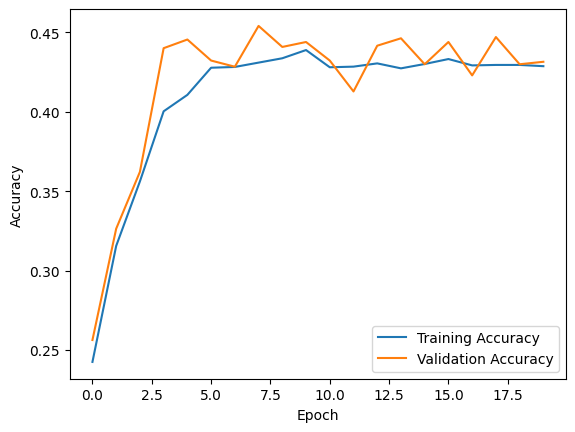

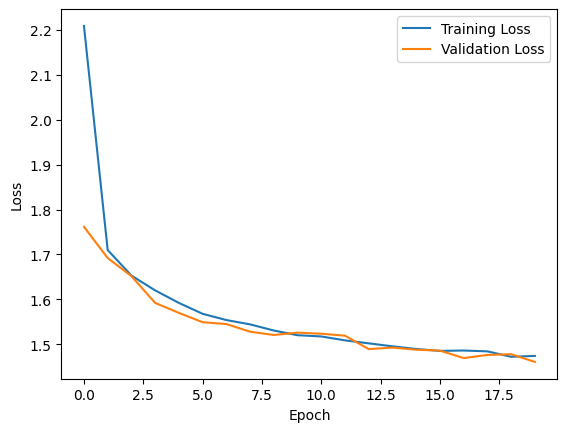

In [33]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate({"text_input": test_tokenized_inputs["input_ids"], "numeric_input": test_numeric_features}, test_cat_labels)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [42]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Assuming model.predict returns categorical probabilities for each class
predicted_probs = model.predict({"text_input": test_tokenized_inputs["input_ids"], "numeric_input": test_numeric_features})

# Convert probabilities to class labels
predicted_labels = np.argmax(predicted_probs, axis=1)

# Convert one-hot encoded true labels to class labels
true_labels = np.argmax(test_cat_labels, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate precision, recall, and F1 score
classification_rep = classification_report(true_labels, predicted_labels)
print("Classification Report:")
print(classification_rep)


40/40 [==============================] - 10s 208ms/step
Confusion Matrix:
[[ 38  45   1   6   2   0]
 [  7 147  54   7  32   2]
 [  1  75  85   2  49   0]
 [  1  72  36  60  95   1]
 [  1  41  44   6 149   0]
 [  3  44  30   8  91  32]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.41      0.53        92
           1       0.35      0.59      0.44       249
           2       0.34      0.40      0.37       212
           3       0.67      0.23      0.34       265
           4       0.36      0.62      0.45       241
           5       0.91      0.15      0.26       208

    accuracy                           0.40      1267
   macro avg       0.56      0.40      0.40      1267
weighted avg       0.54      0.40      0.39      1267



Trial 4

In [43]:
train_df['new_label']= [1 if x=="true"or x=="mostly-true" or x=="half-true" else 0 for x in train_df['Label']] 

In [44]:
train_df['new_label'].value_counts()

new_label
1    5752
0    4486
Name: count, dtype: int64

In [45]:
val_df['new_label']= [1 if x=="true"or x=="mostly-true" or x=="half-true" else 0 for x in val_df['Label']]
test_df['new_label']= [1 if x=="true"or x=="mostly-true" or x=="half-true" else 0 for x in test_df['Label']] 

In [49]:
train_numeric_features = train_df[['Barely_true_counts', 'False_counts', 'Half_true_counts', 'Mostly_true_counts', 'Pants_on_fire_counts']].values.tolist()
val_numeric_features  = val_df[['Barely_true_counts', 'False_counts', 'Half_true_counts', 'Mostly_true_counts', 'Pants_on_fire_counts']].values.tolist()
test_numeric_features = test_df[['Barely_true_counts', 'False_counts', 'Half_true_counts', 'Mostly_true_counts', 'Pants_on_fire_counts']].values.tolist()

import numpy as np
train_numeric_features = np.array(train_numeric_features)
val_numeric_features = np.array(val_numeric_features)
test_numeric_features = np.array(test_numeric_features)

train_labels= train_df['new_label'].values
val_labels= val_df['new_label'].values
test_labels= test_df['new_label'].values

In [50]:
# Build the model
bert_model.trainable = False
text_input = Input(shape=(None,), dtype=tf.int32, name="text_input")
numeric_input = Input(shape=(len(train_numeric_features[0]),), dtype=tf.float32, name="numeric_input")

# BERT model for textual features
text_output = bert_model(text_input)["last_hidden_state"]
text_output = GlobalAveragePooling1D()(text_output)

# Dense layer for numeric features
numeric_output = Dense(32, activation="relu")(numeric_input)
numeric_output = Dense(64, activation="relu")(numeric_output)
# Concatenate the outputs
concatenated = Concatenate()([text_output, numeric_output])

# Add more dense layers if needed
output = Dense(128, activation="sigmoid", kernel_regularizer=regularizers.l2(0.01))(concatenated)
output= Dense(64, activation="sigmoid", kernel_regularizer=regularizers.l2(0.01))(output)
output = Dense(1, activation="softmax")(output)

# Create the model
model = Model(inputs=[text_input, numeric_input], outputs=output)

In [51]:
from tensorflow.keras.optimizers import Adam

# Use Adam optimizer with gradient clipping
optimizer = Adam(clipvalue=1.0)  # You can adjust the clipvalue as needed

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(
    {"text_input": train_tokenized_inputs["input_ids"], "numeric_input": train_numeric_features},
    train_labels,
    epochs=20,
    batch_size=32,
    validation_data=({"text_input": val_tokenized_inputs["input_ids"], "numeric_input": val_numeric_features}, val_labels)
)

Epoch 1/20
320/320 [==============================] - 90s 249ms/step - loss: 1.0179 - accuracy: 0.5618 - val_loss: 0.6647 - val_accuracy: 0.5202
Epoch 2/20
320/320 [==============================] - 79s 247ms/step - loss: 0.6210 - accuracy: 0.5618 - val_loss: 0.6077 - val_accuracy: 0.5202
Epoch 3/20
320/320 [==============================] - 80s 249ms/step - loss: 0.5949 - accuracy: 0.5618 - val_loss: 0.5892 - val_accuracy: 0.5202
Epoch 4/20
320/320 [==============================] - 81s 254ms/step - loss: 0.5810 - accuracy: 0.5618 - val_loss: 0.5930 - val_accuracy: 0.5202
Epoch 5/20
320/320 [==============================] - 82s 257ms/step - loss: 0.5694 - accuracy: 0.5618 - val_loss: 0.5664 - val_accuracy: 0.5202
Epoch 6/20
320/320 [==============================] - 82s 257ms/step - loss: 0.5618 - accuracy: 0.5618 - val_loss: 0.5621 - val_accuracy: 0.5202
Epoch 7/20
320/320 [==============================] - 82s 257ms/step - loss: 0.5571 - accuracy: 0.5618 - val_loss: 0.5605 - val_ac